# PARTE 31: ANÁLISIS DE OUTLIERS

## PARTE 31.1: DETECTAR PRESENCIA DE OUTLIERS

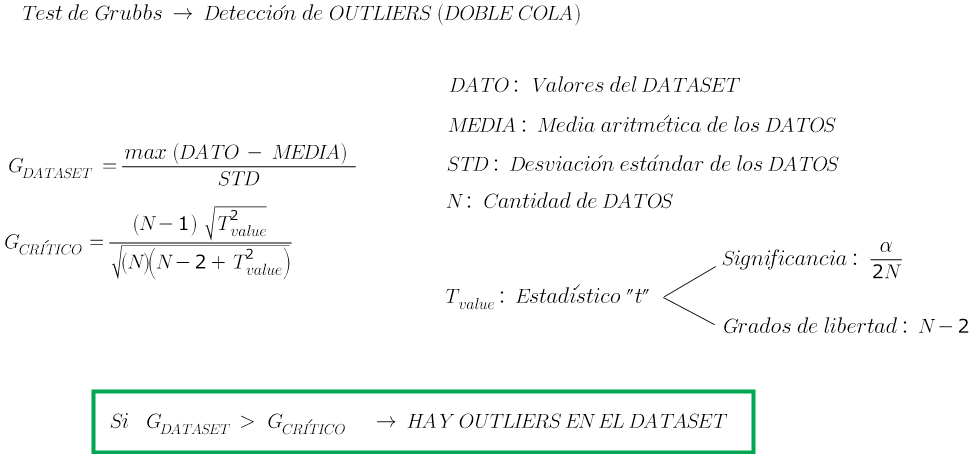

In [1]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/OUTLIERS.png")

## PARTE 31.2: FUNCIÓN DETECTAR PRESENCIA DE OUTLIERS

In [2]:
import pandas as pd

LISTA_1 = [10,11,12,15,16,17,19,21,24,26]
LISTA_2 = [10,11,12,15,16,17,19,21,24,500]

DATASET = pd.DataFrame ({
    "COL1":LISTA_1,
    "COL2":LISTA_2
})

def PRESENCIA_OUTLIERS(DATOS):
    import numpy as np
    import scipy.stats as sta
    
    CANTIDAD = len(DATOS)
    PROMEDIO = np.mean(DATOS)
    DESVIACION = np.std(DATOS)
    
    G_DATASET = max(abs(DATOS-PROMEDIO))/DESVIACION
    
    #ppf --> percent point function
    #(1 - SIGNIFICANCIA , GRADOS DE LIBERTAD)
    T_VALUE = sta.t.ppf(1 - 0.05/(2*CANTIDAD) , CANTIDAD-2)
    
    G_CRITICO = (CANTIDAD-1) * np.sqrt(np.square(T_VALUE)) / np.sqrt((CANTIDAD)*(CANTIDAD-2+np.square(T_VALUE)))
    
    if G_DATASET > G_CRITICO:
        print("SÍ HAY OUTLIERS")

In [3]:
DATASET

,COL1,COL2
0,10,10
1,11,11
2,12,12
3,15,15
4,16,16
5,17,17
6,19,19
7,21,21
8,24,24
9,26,500


In [4]:
PRESENCIA_OUTLIERS(DATASET["COL1"])

In [5]:
PRESENCIA_OUTLIERS(DATASET["COL2"])

SÍ HAY OUTLIERS


## PARTE 31.3: FUNCIÓN IDENTIFICAR OUTLIERS

In [6]:
import pandas as pd

LISTA_1 = [10,11,12,15,16,17,19,21,24,26]
LISTA_2 = [10,11,12,15,16,17,19,21,24,500]

DATASET = pd.DataFrame ({
    "COL1":LISTA_1,
    "COL2":LISTA_2
})

def IDENTIFICAR_OUTLIERS(DATOS):
    import numpy as np
    from pyod.models.knn import KNN
    
    PORCENTAJE_OUTLIERS = 0.01
    MODELO_OUT = KNN(contamination = PORCENTAJE_OUTLIERS)
    MODELO_OUT.fit(DATOS)
    
    FLAG_OUTLIER = MODELO_OUT.labels_
    print("FLAG_OUTLIER -> ",FLAG_OUTLIER)
    
    INDICE_OUTLIERS = []
    
    for INDICE,VALOR in enumerate(list(FLAG_OUTLIER)):
        if VALOR == 1:
            INDICE_OUTLIERS.append(INDICE)
    print("INDICE_OUTLIERS -> ",INDICE_OUTLIERS)
    
    SCORE_OUTLIERS = MODELO_OUT.decision_scores_
    print("SCORE_OUTLIERS -> ",SCORE_OUTLIERS)

In [7]:
IDENTIFICAR_OUTLIERS(DATASET[["COL2"]])

FLAG_OUTLIER ->  [0 0 0 0 0 0 0 0 0 1]
INDICE_OUTLIERS ->  [9]
SCORE_OUTLIERS ->  [  7.   6.   5.   4.   5.   5.   5.   6.   9. 484.]


In [8]:
DATASET

,COL1,COL2
0,10,10
1,11,11
2,12,12
3,15,15
4,16,16
5,17,17
6,19,19
7,21,21
8,24,24
9,26,500


## PARTE 31.4: ANÁLISIS DE OUTLIERS EN DATASETS

* SOLO SE DEBE BUSCAR OUTLIERS SOBRE VARIABLES NUMÉRICAS
* DEBES ESTAR DISPUESTO A ELIMINAR MÁXIMO EL 2% DE LOS REGISTROS
* SOLO DEBES BUSCAR OUTLIERS SOBRE VARIABLES RELEVANTES
* APÓYATE EN EL BOXPLOT PARA ENCONTRAR ALGUNOS POSIBLES OUTLIERS
* LA ELIMINACIÓN DE OUTLIERS SE DEBE REALIZAR ANTES DE MODELAR
* DEBES VERIFICAR SI LOS INDICADORES MEJORAN POSTERIOR A LA ELIMINACIÓN DE OUTLIERS

#### DATASET SALES

In [9]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/23_1_CORRELACION_VENTAS.csv"
DATASET = pd.read_csv(RUTA)
DATASET.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


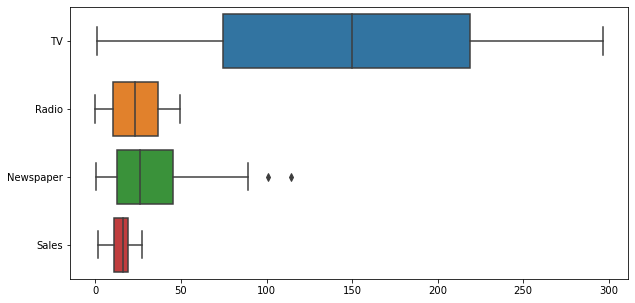

In [13]:
#ANÁLISIS MEDIANTE BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.boxplot(data = DATASET,orient = "h")
plt.show()

In [17]:
COLUMNAS_ANALIZAR = list(DATASET.select_dtypes(include = ["float64"]))

#BÚSQUEDA DE OUTLIERS
for VAR in COLUMNAS_ANALIZAR:
    print("-------{}-------".format(VAR))
    PRESENCIA_OUTLIERS(DATASET[VAR])

-------TV-------
-------Radio-------
-------Newspaper-------
SÍ HAY OUTLIERS
-------Sales-------


In [20]:
#IDENTIFICACIÓN DE OUTLIERS
IDENTIFICAR_OUTLIERS(DATASET[["Newspaper"]])

FLAG_OUTLIER ->  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
INDICE_OUTLIERS ->  [16, 101]
SCORE_OUTLIERS ->  [ 3.3  0.8  3.4  0.9  0.8  3.2  0.3  0.9  1.1  0.6  0.8  1.   3.3  0.9
  0.9  1.7 38.4  2.6  0.4  0.6  2.   0.3  0.9  0.6  0.4  0.8  0.5  0.5
  0.5  2.1  1.4  0.9  1.1  1.8  1.   0.2  0.8  0.6  0.6  0.5  0.4  0.9
  0.8  0.8  1.5  0.5  1.1  0.6  0.6  1.1  0.6  1.2  1.2  1.   1.1  1.5
  1.8  1.   0.9  0.2  0.7  1.8  1.1  0.3  1.5  1.2  1.   0.8  0.9  1.
  0.9  0.4  0.8  0.6  0.7 14.4  0.7  1.1  0.2  0.3  0.7  1.   0.9  1.
  0.8  3.5  1.2  3.2  2.2  1.3  0.2  1.4  0.7  3.   1.   1.7  0.4  0.6
  1.3  0.8  0.7 25.3  0.7  0.5  

In [21]:
#ELIMINACIÓN DE OUTLIERS SOBRE EL DATASET
DATASET = DATASET.drop([16, 101] , axis = 0)

#### DATASET PRICES CARROS

In [24]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/25_1_CORRELACION_CARROS.csv"
DATASET = pd.read_csv(RUTA)
DATASET.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


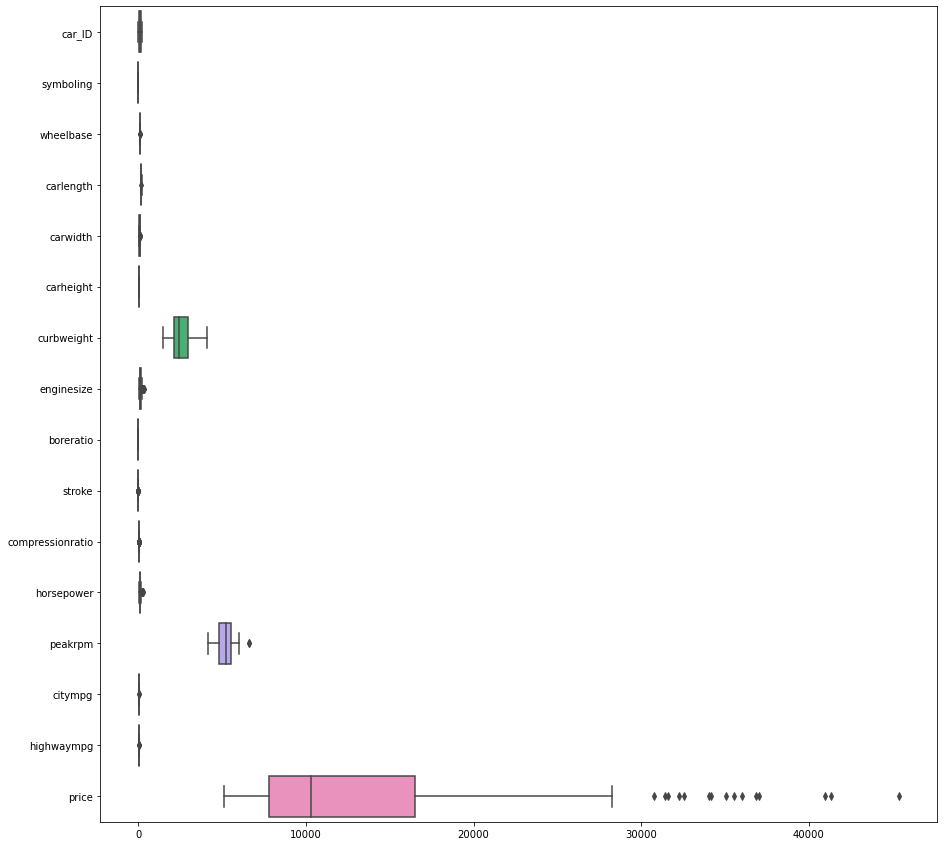

In [25]:
#ANÁLISIS MEDIANTE BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.boxplot(data = DATASET,orient = "h")
plt.show()

In [27]:
COLUMNAS_ANALIZAR = list(DATASET.select_dtypes(include = ["float64","int64"]))

#BÚSQUEDA DE OUTLIERS
for VAR in COLUMNAS_ANALIZAR:
    print("-------{}-------".format(VAR))
    PRESENCIA_OUTLIERS(DATASET[VAR])

-------car_ID-------
-------symboling-------
-------wheelbase-------
SÍ HAY OUTLIERS
-------carlength-------
-------carwidth-------
-------carheight-------
-------curbweight-------
-------enginesize-------
SÍ HAY OUTLIERS
-------boreratio-------
-------stroke-------
SÍ HAY OUTLIERS
-------compressionratio-------
-------horsepower-------
SÍ HAY OUTLIERS
-------peakrpm-------
-------citympg-------
SÍ HAY OUTLIERS
-------highwaympg-------
-------price-------
SÍ HAY OUTLIERS


In [28]:
#IDENTIFICACIÓN DE OUTLIERS
IDENTIFICAR_OUTLIERS(DATASET[["price"]])

FLAG_OUTLIER ->  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
INDICE_OUTLIERS ->  [16, 73, 74]
SCORE_OUTLIERS ->  [ 200.      70.      70.     451.     409.167  395.     440.     521.
 1857.     290.833  128.     274.    1500.    1406.    2547.    2512.
 5315.    2696.     248.     106.      96.     224.     148.      56.
  134.      93.     129.     200.      28.     331.     141.      83.
  173.     140.     140.     100.     100.      80.     174.      76.
  300.     316.     350.      93.      32.5     32.5    200.    1778.
 1478.    1816.     204.     243.     103.      90.     100.     254.
  296.     215.     340.

In [29]:
#IDENTIFICACIÓN DE OUTLIERS
IDENTIFICAR_OUTLIERS(DATASET[["enginesize"]])

FLAG_OUTLIER ->  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
INDICE_OUTLIERS ->  [49, 73, 74]
SCORE_OUTLIERS ->  [ 1.  1.  0.  0.  2.  2.  2.  2.  1.  1.  0.  0.  7.  7.  7. 15. 15. 15.
 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0. 11.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. 49. 49. 92.  1.  1.  1.  1.
  1. 10. 10. 10. 10.  0.  0.  0.  0.  0.  0.  1.  2.  2.  2.  2.  2. 25.
 25. 74. 70.  1.  0.  0.  0.  0.  0.  0.  4.  4.  4.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4.  1.
 11

In [30]:
#ELIMINACIÓN DE OUTLIERS SOBRE EL DATASET
DATASET = DATASET.drop([16, 49, 73, 74] , axis = 0)

#### DATASET DIABETES

In [31]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)
DATASET.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


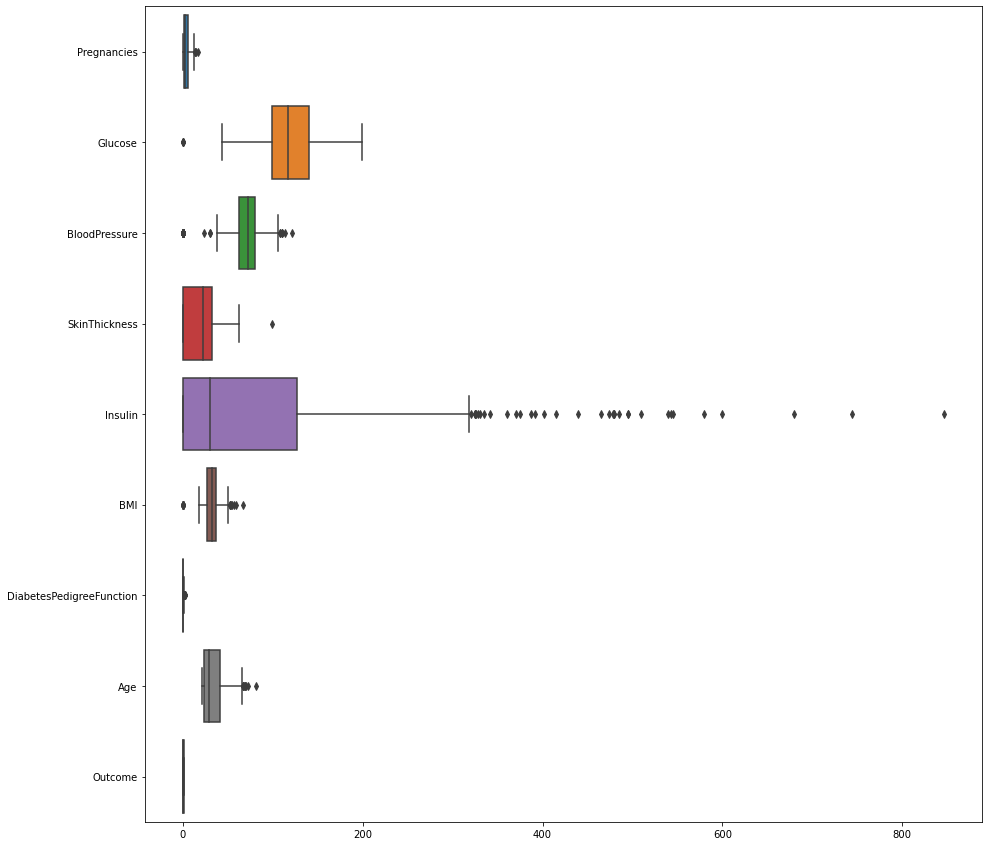

In [32]:
#ANÁLISIS MEDIANTE BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.boxplot(data = DATASET,orient = "h")
plt.show()

In [33]:
COLUMNAS_ANALIZAR = list(DATASET.select_dtypes(include = ["float64","int64"]))

#BÚSQUEDA DE OUTLIERS
for VAR in COLUMNAS_ANALIZAR:
    print("-------{}-------".format(VAR))
    PRESENCIA_OUTLIERS(DATASET[VAR])

-------Pregnancies-------
-------Glucose-------
-------BloodPressure-------
-------SkinThickness-------
SÍ HAY OUTLIERS
-------Insulin-------
SÍ HAY OUTLIERS
-------BMI-------
SÍ HAY OUTLIERS
-------DiabetesPedigreeFunction-------
SÍ HAY OUTLIERS
-------Age-------
SÍ HAY OUTLIERS
-------Outcome-------


In [34]:
#IDENTIFICACIÓN DE OUTLIERS
IDENTIFICAR_OUTLIERS(DATASET[["DiabetesPedigreeFunction"]])

FLAG_OUTLIER ->  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [35]:
#IDENTIFICACIÓN DE OUTLIERS
IDENTIFICAR_OUTLIERS(DATASET[["BMI"]])

FLAG_OUTLIER ->  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [37]:
#ELIMINACIÓN DE OUTLIERS SOBRE EL DATASET
DATASET = DATASET.drop([4, 45, 58, 228, 370, 445, 593, 621, 120, 125, 177, 193, 247, 303, 445, 673] , axis = 0)